In [1]:
import warnings
warnings.filterwarnings('ignore')
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

Prophet 0.7.1


In [8]:
df = pd.read_excel("https://github.com/shabbirg89/Time-series-Analysis-on-Covid-19-New-Cases-Deaths-using-Fbprophet-in-R-Python/raw/master/25_onwards.xlsx",header=0)
df

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Unnamed: 6,Unnamed: 7
0,2020-03-25,606.0,6.0,553.0,43.0,10.0,NaN,NaN
1,2020-03-26,606.0,0.0,553.0,43.0,10.0,NaN,NaN
2,2020-03-27,694.0,100.0,633.0,45.0,16.0,NaN,NaN
3,2020-03-28,798.0,81.0,714.0,65.0,19.0,NaN,NaN
4,2020-03-29,931.0,105.0,819.0,87.0,25.0,NaN,NaN
...,...,...,...,...,...,...,...,...
165,2020-09-06,4202575.0,69624.0,4202575.0,3247290.0,71103.0,NaN,NaN
166,2020-09-07,4277597.0,74123.0,4277597.0,3321413.0,72232.0,NaN,NaN
167,2020-09-08,4367449.0,74607.0,4367449.0,3396020.0,73339.0,NaN,NaN
168,2020-09-09,4462978.0,73057.0,4462978.0,3469077.0,74507.0,NaN,NaN


In [9]:
df1 = df[["Date","Deaths"]]
df1.tail()

,Date,Deaths
165,2020-09-06,71103.0
166,2020-09-07,72232.0
167,2020-09-08,73339.0
168,2020-09-09,74507.0
169,NaT,NaN


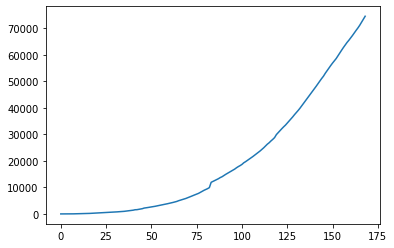

In [10]:
# plot the time series
df1['Deaths'].plot()
plt.show()

In [11]:

# prepare expected column names
df1.columns = ['ds', 'y']
df1['ds']= pd.to_datetime(df1['ds'])

In [12]:
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
prediction_size = 90
# define the period for which we want a prediction
future = model.make_future_dataframe(prediction_size)
future.tail()

,ds
255,2020-12-04
256,2020-12-05
257,2020-12-06
258,2020-12-07
259,2020-12-08


In [14]:

df = df.reset_index(drop=True).dropna()
df1 = df1.reset_index(drop=True).dropna()
future = future.reset_index(drop=True).dropna()

In [15]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
254,2020-12-04,156544.966420,138551.543839,173682.574117,138424.313456,173775.165659,14.004508,14.004508,14.004508,14.004508,14.004508,14.004508,0.0,0.0,0.0,156558.970928
255,2020-12-05,157503.632035,139027.695055,174978.448304,139099.977609,175066.841229,-1.316396,-1.316396,-1.316396,-1.316396,-1.316396,-1.316396,0.0,0.0,0.0,157502.315639
256,2020-12-06,158462.297650,139671.902281,176293.706091,139792.933450,176309.669752,-18.186297,-18.186297,-18.186297,-18.186297,-18.186297,-18.186297,0.0,0.0,0.0,158444.111353
257,2020-12-07,159420.963265,140288.276767,177603.808700,140318.651974,177554.786507,-55.999287,-55.999287,-55.999287,-55.999287,-55.999287,-55.999287,0.0,0.0,0.0,159364.963978
258,2020-12-08,160379.628881,140969.806835,178925.416214,141001.549481,178843.755759,12.457499,12.457499,12.457499,12.457499,12.457499,12.457499,0.0,0.0,0.0,160392.086380


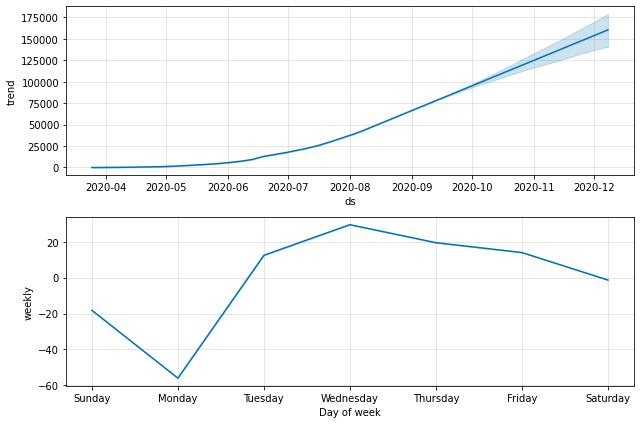

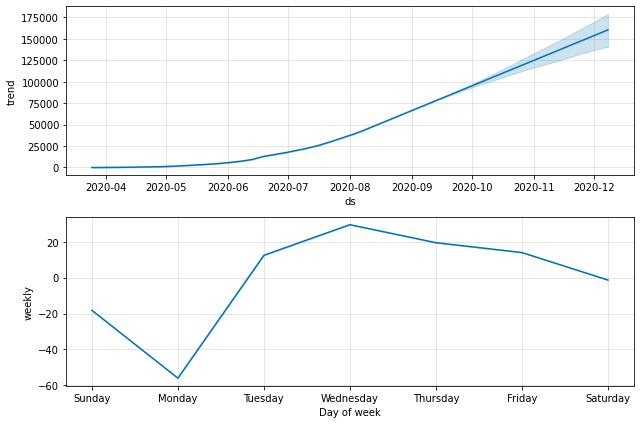

In [16]:

model.plot_components(forecast)

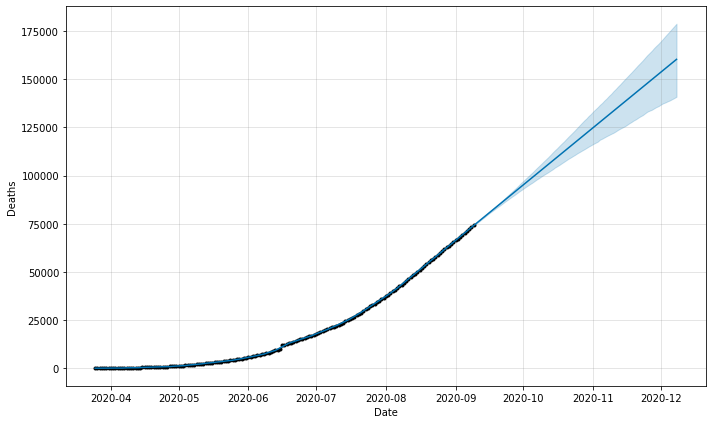

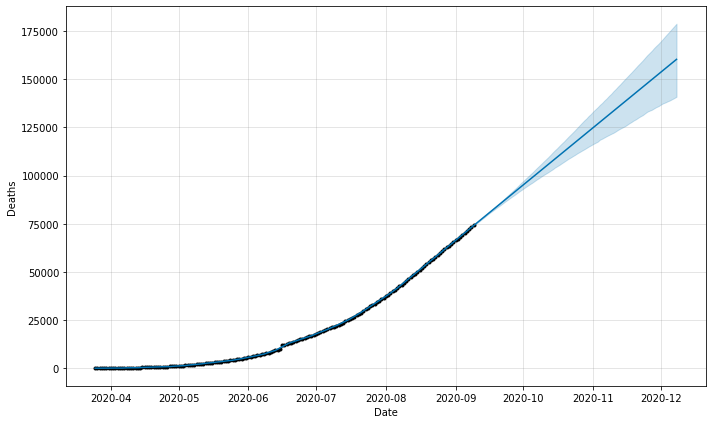

In [17]:
model.plot(forecast,xlabel = 'Date', ylabel = 'Deaths')

In [18]:
# my
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
trace = go.Scatter(
    name = 'Actual Death',
    mode = 'markers',
    x = list(df1['ds']),
    y = list(df1['y']),
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)
trace1 = go.Scatter(
    name = 'trend',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)

tracex = go.Scatter(
    name = 'Actual Death',
   mode = 'markers',
   x = list(df1['ds']),
   y = list(df1['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)
data = [tracex, trace1, lower_band, upper_band, trace]

layout = dict(title='Death prediction due to covid-19 Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)

In [ ]:
plt.savefig('forecastcovid_death.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
py.offline.iplot(figure)
plt.show()